In [43]:
import pandas as pd
import torch   

#handling text data
from torchtext.legacy import data  

In [44]:
dataset=pd.read_csv('/content/drive/MyDrive/CSE4238/Dataset 2.csv',encoding='ISO-8859-1')
dataset

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [45]:
import re
def remove(text):
    return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)

In [46]:
dataset['text'] = dataset['text'].apply(lambda x: remove(x))

In [48]:
dataset

,text,polarity
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [49]:
dataset.drop(10313,inplace=True)

In [50]:
dataset

,text,polarity
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [51]:
dataset.drop( dataset[dataset.text.str.len() < 5].index, inplace=True)

In [52]:
dataset

,text,polarity
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [53]:
dataset.to_csv('data.csv',index=False)

In [54]:
#keras
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [55]:
dataset=pd.read_csv("data.csv")

In [56]:
dataset

,text,polarity
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10305,Many sufferers of depression aren't sad they f...,1
10306,No Depression by G Herbo is my mood from now o...,1
10307,What do you do when depression succumbs the br...,1
10308,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [57]:
import tensorflow as tf

In [58]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [59]:
voc_size=5000
import nltk
import re
from nltk.corpus import stopwords

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [62]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3269, 4908, 2359, 3502, 4054],
 [2556, 4537, 4974, 4654],
 [1769, 4027, 4748, 2022],
 [4301, 2258, 962, 4841, 1285, 1399, 1107, 817, 852, 2151, 4358, 1971, 3002],
 [4048, 1255, 4824],
 [424, 4908, 1641, 4107, 3002],
 [162, 3643, 3873, 3625, 4393, 2776, 1602, 392, 3992, 294],
 [1429, 1739, 945, 24],
 [4215, 1016, 2523, 237],
 [2655, 1702, 4090, 1649, 657],
 [4908, 1819, 4793],
 [613, 2414, 1062, 1001, 3625, 1001, 180, 3563, 1202, 542, 3604],
 [1340, 768, 179, 695, 2018, 179, 1693, 695, 2320, 3477, 2624],
 [3227, 3581, 2320, 4996, 1309, 4259, 440],
 [2961, 2409, 3285, 2455],
 [1505, 1686, 3617, 3692, 3617, 4545, 3836],
 [1029, 4735, 3973, 3032, 1001, 764, 179, 1760, 4996, 3942],
 [1368, 358, 4032, 1349],
 [2830, 4274, 2110, 3572, 4908, 3652, 3692, 2310],
 [4388, 3858, 2556, 3673, 2310, 1851, 537],
 [3040, 4471, 451, 2689, 4528, 2867, 4260],
 [388, 4634, 515, 3950, 2411, 2877, 4560, 4169, 459, 1288, 4307, 1617, 4914],
 [2410, 2687, 4050, 3324, 1654, 393, 1188, 2809],
 [210, 1122, 4475, 

In [63]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2359 3502 4054]
 [   0    0    0 ... 4537 4974 4654]
 [   0    0    0 ... 4027 4748 2022]
 ...
 [   0    0    0 ... 3692 3074 3165]
 [   0    0    0 ... 2279 4152 4855]
 [   0    0    0 ...  504 1090 4841]]


In [64]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(dataset.polarity)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [66]:
import matplotlib.pyplot as plt

In [67]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [68]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100,return_sequences=True,input_shape=(3,1)))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(300))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 20, 100)           56400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 20, 200)           240800    
_________________________________________________________________
lstm_8 (LSTM)                (None, 300)               601200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
Total params: 1,098,701
Trainable params: 1,098,701
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
129/129 [==============================] - 43s 296ms/step - loss: 0.2770 - accuracy: 0.8929 - val_loss: 0.0558 - val_accuracy: 0.9859
Epoch 2/10
129/129 [==============================] - 37s 286ms/step - loss: 0.0334 - accuracy: 0.9914 - val_loss: 0.0531 - val_accuracy: 0.9859
Epoch 3/10
129/129 [==============================] - 37s 287ms/step - loss: 0.0136 - accuracy: 0.9968 - val_loss: 0.0687 - val_accuracy: 0.9825
Epoch 4/10
129/129 [==============================] - 37s 290ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0843 - val_accuracy: 0.9845
Epoch 5/10
129/129 [==============================] - 38s 291ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0776 - val_accuracy: 0.9850
Epoch 6/10
129/129 [==============================] - 38s 292ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0812 - val_accuracy: 0.9850
Epoch 7/10
129/129 [==============================] - 38s 294ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0733 - val_ac

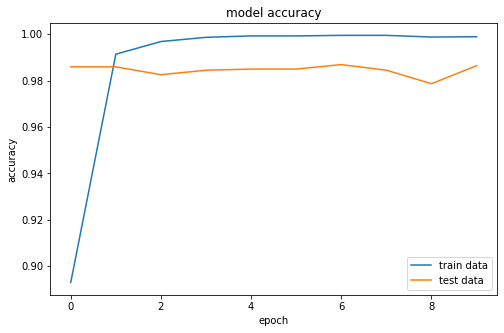

In [75]:
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train data', 'test data'], loc='lower right')
plt.show()

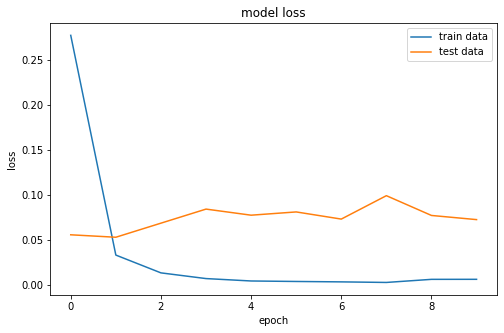

In [78]:
# summarize history for loss
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train data', 'test data'], loc='upper right')
plt.show()

In [79]:
y_pred=np.round(model.predict(X_test))

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9864209505334627

In [81]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9864209505334627

In [82]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9864209505334627

In [84]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9552238805970149

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrice = confusion_matrix(y_test,y_pred)
matrice

array([[1586,    7],
       [  21,  448]])

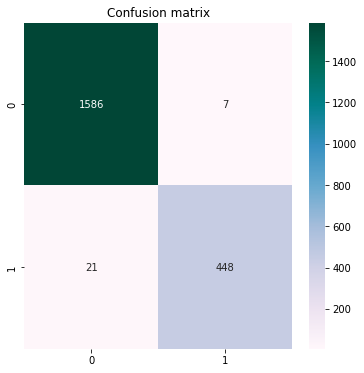

In [92]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='PuBuGn',)
plt.title(f"Confusion matrix")
plt.show()

In [91]:
classify_report = classification_report(y_test, y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1593
           1       0.98      0.96      0.97       469

    accuracy                           0.99      2062
   macro avg       0.99      0.98      0.98      2062
weighted avg       0.99      0.99      0.99      2062

